# Capstone Project - Car accident severity

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this problem we will try to predict the severity of an accident. Specifically, this report will targets those interested in **driving to Seattle for work, or to visit friends**.

Since there are lots of accidents in Seattle we will try to detect **collisions that occur around the city**. We are also particularly interested in the **possibility of you getting into a car accident** and **how severe it would be**, so that you would drive more carefully or even change your travel if you are able to. 

## Data <a name="data"></a>

There are 37 variables in this dataset 
The target variable is defined as the severitycode. Further,the following codes correspond to the severity of the accident. 
* 3 — Fatality
* 2b — Serious injury
* 2 — Injury
* 1 — Property damage 
* 0 — Unknown 

Based on our problem, the attributes that will be used in our prediction of an accident include:
* a description of the weather conditions during the time of the collision 
* the condition of the road during the collision 
* the light conditions during the collision 

Following data sources will be needed to extract/generate the required information:
* All collisions provided by **Seattle Police Department** and recorded by Traffic Records. The timeframe for the data is from 2004 to present, and is updated weekly. 

### Data Understanding

Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data From CSV File


In [2]:
df = pd.read_csv("Data-Collisions.csv", low_memory = False)
print("Data Successfully loaded")
df.head()

Data Successfully loaded


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

We can see that the data types of the features we are working with are of type object(string)

### Data Visualization

In [5]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

136485 people had property damaged during an accident while 58188 have been injured. 



In [6]:
df[['WEATHER', 'LIGHTCOND', 'ROADCOND']].describe()

,WEATHER,LIGHTCOND,ROADCOND
count,189592,189503,189661
unique,11,9,9
top,Clear,Daylight,Dry
freq,111135,116137,124510


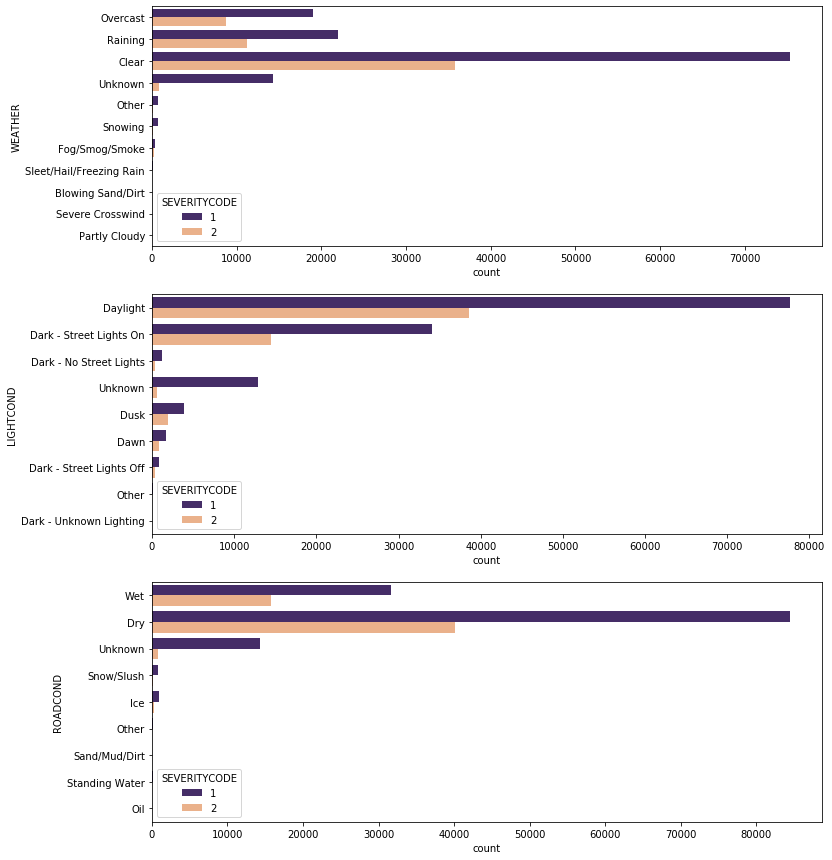

In [7]:
fig, axs = plt.subplots(3,1, figsize = (12,15))
palette = ['#432371',"#FAAE7B"]
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df, ax=axs[0], palette = palette)
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df, ax = axs[1],palette = palette)
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df,palette = palette)

In [8]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [9]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [10]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [11]:
# for column in df.isnull().columns.values.tolist():
#     print(column)
#     print (df.isnull()[column].value_counts())
#     print("")   

### Data Cleaning

In [12]:
#replace the missing 'num-of-doors' values by the most frequent 
print(df['WEATHER'].value_counts().idxmax())
# df["WEATHER"].replace(np.nan, "Clear", inplace=True)
# my_list = ['Unknown', 'Other', 'Dark - Unknown Lighting'] 
# df_test = df.drop(df[(df['WEATHER'] == 'Unknown') | df['WEATHER'] == 'Other')].index)
# df = df.loc[~df['WEATHER'].isin(my_list)]
df["WEATHER"].replace([np.nan, 'Unknown', 'Other'], "Clear", inplace=True)
print(sum(df['WEATHER'].isna()))
print(df['WEATHER'].value_counts())
print(df.shape)

Clear
0
Clear                       132139
Raining                      33145
Overcast                     27714
Snowing                        907
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
(194673, 38)


In [13]:
#replace the missing 'num-of-doors' values by the most frequent 
print(df['ROADCOND'].value_counts().idxmax())
df["ROADCOND"].replace([np.nan, 'Unknown', 'Other'], "Dry", inplace=True)
# my_list = ['Unknown', 'Other'] 
# df = df.loc[~df['ROADCOND'].isin(my_list)]
print(sum(df['ROADCOND'].isna()))
print(df['ROADCOND'].value_counts())
print(df.shape)

Dry
0
Dry               144732
Wet                47474
Ice                 1209
Snow/Slush          1004
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
(194673, 38)


In [30]:
#replace the missing 'num-of-doors' values by the most frequent 
print(df['LIGHTCOND'].value_counts().idxmax())
df["LIGHTCOND"].replace([np.nan, 'Unknown', 'Other'], "Daylight", inplace=True)
# sum(df['LIGHTCOND'].isna())
# my_list = ['Unknown', 'Other'] 
# df = df.loc[~df['LIGHTCOND'].isin(my_list)]
print(sum(df['LIGHTCOND'].isna()))
print(df['LIGHTCOND'].value_counts())
print(df.shape)

Daylight
0
Daylight                    129845
Dark - Street Lights On      48507
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64
(189503, 4)


In [31]:
# sum(df[['SEVERITYCODE', 'WEATHER', 'LIGHTCOND', 'ROADCOND'].isna())
df = df[['SEVERITYCODE', 'WEATHER', 'LIGHTCOND', 'ROADCOND']].dropna()
df.shape

(189503, 4)

### Balancing Data

In [32]:
df['SEVERITYCODE'].value_counts()

1    132405
2     57098
Name: SEVERITYCODE, dtype: int64

Note that the data is unbalanced since the count of each attribute differs. 

Proportion: 0.43 : 2


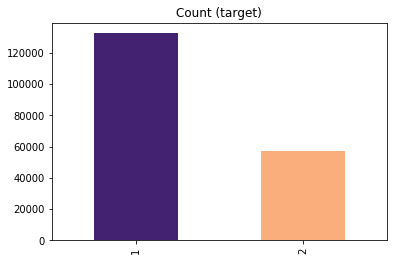

In [33]:
target_count = df['SEVERITYCODE'].value_counts()
color = ['#432371',"#FAAE7B"]

print('Proportion:', round(target_count[2] /target_count[1], 2), ': 2')
target_count.plot(kind='bar', title='Count (target)', color = palette);

Random downsampling:
2    57098
1    57098
Name: SEVERITYCODE, dtype: int64


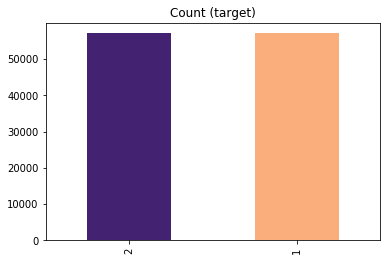

In [34]:
# Divide by class
df_majority  = df[df['SEVERITYCODE'] == 1]
df_minority  = df[df['SEVERITYCODE'] == 2]

df_majority_down = df_majority.sample(target_count[2], random_state = 1)
df_down = pd.concat([df_majority_down, df_minority], axis=0)

print('Random downsampling:')
print(df_down['SEVERITYCODE'].value_counts())

df_down['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (target)', color = palette);

In [35]:
df_down.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
4410,1,Clear,Daylight,Dry
111731,1,Clear,Dark - Street Lights On,Dry
71242,1,Raining,Dark - Street Lights On,Wet
141946,1,Overcast,Daylight,Dry
100071,1,Raining,Dark - Street Lights On,Wet


In [36]:
df_down = df_down.reset_index(drop=True)
df_down.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,1,Clear,Daylight,Dry
1,1,Clear,Dark - Street Lights On,Dry
2,1,Raining,Dark - Street Lights On,Wet
3,1,Overcast,Daylight,Dry
4,1,Raining,Dark - Street Lights On,Wet


In [37]:
# set(df_severity['WEATHER'])
# set(df_severity['ROADCOND'])
set(df['LIGHTCOND'])

{'Dark - No Street Lights',
 'Dark - Street Lights Off',
 'Dark - Street Lights On',
 'Dark - Unknown Lighting',
 'Dawn',
 'Daylight',
 'Dusk'}

In [38]:
# dummy_variable_1 = pd.get_dummies(df_test_under["WEATHER"])
# dummy_variable_1.head()

In [39]:
features = ['WEATHER', 'ROADCOND','LIGHTCOND']
X = df_down[features].values

# df = pd.concat([df_test_under, dummy_variable_1], axis=1)
X[0:5]

array([['Clear', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Dark - Street Lights On'],
       ['Raining', 'Wet', 'Dark - Street Lights On'],
       ['Overcast', 'Dry', 'Daylight'],
       ['Raining', 'Wet', 'Dark - Street Lights On']], dtype=object)

### Convert Categorical features to numerical values 

#### Label Enocoding

In [40]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Blowing Sand/Dirt',
 'Clear',
 'Fog/Smog/Smoke',
 'Overcast',
 'Partly Cloudy',
 'Raining',
 'Severe Crosswind',
 'Sleet/Hail/Freezing Rain',
 'Snowing'])
X[:,0] = le_sex.transform(X[:,0]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit(['Dry',
 'Ice',
 'Oil',
 'Sand/Mud/Dirt',
 'Snow/Slush',
 'Standing Water',
 'Wet'])
X[:,1] = le_BP.transform(X[:,1])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['Dark - No Street Lights',
 'Dark - Street Lights Off',
 'Dark - Street Lights On',
 'Dark - Unknown Lighting',
 'Dawn',
 'Daylight',
 'Dusk'])
X[:,2] = le_Chol.transform(X[:,2]) 

X[0:5]

array([[1, 0, 5],
       [1, 0, 2],
       [5, 6, 2],
       [3, 0, 5],
       [5, 6, 2]], dtype=object)

### Normalize Data

In [41]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.65638472, -0.60155854,  0.57668018],
       [-0.65638472, -0.60155854, -1.55856662],
       [ 1.82090221,  1.68039599, -1.55856662],
       [ 0.58225874, -0.60155854,  0.57668018],
       [ 1.82090221,  1.68039599, -1.55856662]])

In [42]:
y = df_down['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Methodology <a name="methodology"></a>

Supervised learning. We are trying to predict classify labeled data. 
Classification algorithms:
K-Nearest Neighbors 

Decision Trees


Logistic Regression 


Support Vector Machine 

## Analysis <a name="analysis"></a>

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91356, 3) (91356,)
Test set: (22840, 3) (22840,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 14
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
k=5
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(KNN)
yhat_KNN = KNN.predict(X_test)
print(np.mean(y_test == yhat_KNN))
print(yhat_KNN[0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    dt = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=dt.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with d=", mean_acc.argmax()+1)

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth (d)')
plt.tight_layout()
plt.show()

In [ ]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT # it shows the default parameters

In [ ]:
DT.fit(X_train,y_train)
yhat_DT = DT.predict(X_test)

In [ ]:
np.mean(y_test == yhat_DT)

### Support Vector Machine

In [ ]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, y_train) 

In [ ]:
yhat_SVM = SVM.predict(X_test)
yhat_SVM [0:5]

In [ ]:
np.mean(y_test == yhat_SVM)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

In [ ]:
yhat_LR = LR.predict(X_test)
yhat_LR

In [ ]:
np.mean(y_test == yhat_LR)

## Results and Discussion <a name="results"></a>

## Conclusion <a name="conclusion"></a>